# Data Quality Review Task

The purpose of this task is to review the three datasets provided by Sprocket Central Pty Ltd and ensure that they are ready for analysis in phase two. This includes identifying any data quality issues and making recommendations to mitigate those concerns.

## Datasets Provided

The following datasets were provided by Sprocket Central Pty Ltd for the purpose of data quality review:

 - Customer Demographic Data
 - Customer Address Data
 - Transaction Data (past three months)

In [1]:
import pandas as pd

# Link of  sheets names

In [2]:
# Replace the file path and file name with your own
file_path = 'C:/Users/aboub/OneDrive - um5.ac.ma/Desktop/MY RESEARCHS/KPMG stage data anlytics'
file_name = 'KPMG_VI_New_raw_data_update_final.xlsx'

## Transactions

In [3]:
transactions_sheet = pd.read_excel(r'C:/Users/aboub/OneDrive - um5.ac.ma/Desktop/MY RESEARCHS/KPMG stage data anlytics/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name ='Transactions')

In [4]:
# display data of transactions sheet
transactions_sheet

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Unnamed: 13,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,Feb,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,May,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,Oct,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,Aug,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,Oct,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,Jun,802.26
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,Nov,104.24
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,Apr,1592.19
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,Jul,91.15


In [5]:
transactions_sheet.shape

(20000, 15)

In [6]:
transactions_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [7]:
# rename column 'Unnamed: 13' to 'Months'
transactions_sheet = transactions_sheet.rename(columns={'Unnamed: 13': 'Months'})

In [8]:
transactions_sheet.describe().round(2)

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date,profit
count,20000.00,20000.00,20000.00,19640.0,20000.00,19803.00,19803.00,20000.00
mean,10000.50,45.36,1738.25,0.5,1107.83,556.05,38199.78,557.26
std,5773.65,30.75,1011.95,0.5,582.83,405.96,2875.20,497.29
min,1.00,0.00,1.00,0.0,12.01,7.21,33259.00,4.80
25%,5000.75,18.00,857.75,0.0,575.27,215.14,35667.00,135.85
50%,10000.50,44.00,1736.00,1.0,1163.89,507.58,38216.00,445.21
75%,15000.25,72.00,2613.00,1.0,1635.30,795.10,40672.00,830.24
max,20000.00,100.00,5034.00,1.0,2091.47,1759.85,42710.00,2086.07


This code is used to count the number of missing values (NaN) in each column of the transactions_sheet. The output shows the number of missing values in each column, with the 'online_order', 'brand', 'product_line', 'product_class', 'product_size', 'standard_cost', and 'product_first_sold_date' columns having 197 missing values each. The 'transaction_date' column has no missing values.

In [9]:
# count the number of NaN(missing) values in each column of the transactions_sheet
transactions_sheet.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
Months                       0
profit                       0
dtype: int64

In [10]:
# check for duplicate rows in transactions_sheet and return the number of duplicated rows
transactions_sheet.duplicated().sum()

0

In [11]:
# returns the number of unique values for each column in the transactions_sheet
transactions_sheet.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
Months                        12
profit                       299
dtype: int64

In [12]:
# fill missing values with a default value
transactions_sheet = transactions_sheet.fillna(0)
# remove rows with missing values
transactions_sheet = transactions_sheet.dropna()
# remove duplicates
#transactions_sheet = transactions_sheet.drop_duplicates()

In [13]:
# replace False with 0 and True with 1
transactions_sheet['online_order'] = transactions_sheet['online_order'].replace({False: 0, True: 1})

In [14]:
transactions_sheet['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
0             197
Name: product_line, dtype: int64

In [15]:
transactions_sheet.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
Months                     0
profit                     0
dtype: int64

In [16]:
# save cleaned data to a new Excel file
transactions_sheet.to_excel('C:/Users/aboub/OneDrive - um5.ac.ma/Desktop/MY RESEARCHS/KPMG stage data anlytics/Transactions.xlsx', sheet_name='Transactions',index=False)


In [17]:
transactions_sheet['online_order'].value_counts()

0.0    10171
1.0     9829
Name: online_order, dtype: int64

In [18]:
transactions_sheet['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
0                  197
Name: brand, dtype: int64

In [19]:
transactions_sheet.dtypes


transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
Months                             object
profit                            float64
dtype: object

In [20]:
from bokeh.plotting import figure, show
from bokeh.models import NumeralTickFormatter
from bokeh.io import output_notebook
from bokeh.layouts import row
import numpy as np
# create the figure
p = figure(title='Distribution of Profits', 
           x_axis_label='Profit', 
           y_axis_label='Frequency',
           tools='box_select, reset')

# create the histogram
hist, edges = np.histogram(transactions_sheet['profit'], bins=50)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
       fill_color='navy', line_color='white', alpha=0.5)

# format the y-axis ticks as percentages
p.yaxis.formatter = NumeralTickFormatter(format='0.00%')

# show the plot
output_notebook()
show(row(p))


Loading BokehJS ...

In [21]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource

# create a ColumnDataSource from the DataFrame
source = ColumnDataSource(transactions_sheet)

# create the figure object
p = figure(title="List Price vs Standard Cost", x_axis_label="Standard Cost", y_axis_label="List Price")

# create the scatter plot
p.scatter(x="standard_cost", y="list_price", source=source)

# show the plot
show(p)


In [22]:
transactions_sheet['product_size'].value_counts()

medium    12990
large      3976
small      2837
0           197
Name: product_size, dtype: int64

In [23]:
import pandas as pd
from bokeh.plotting import figure, show


# Convert categorical values to numerical values
transactions_sheet["product_size_num"] = transactions_sheet["product_size"].map({"small": 1, "medium": 2, "large": 3})

# Create histogram
hist = figure(title="Histogram of Product Size", x_axis_label="Product Size", y_axis_label="Count")
hist.quad(top=transactions_sheet["product_size_num"].value_counts().sort_index().values, bottom=0, left=1, right=4, fill_color="navy", line_color="white", alpha=0.5)

# Add a line plot for the ladder
x = [1, 2, 3]
y = transactions_sheet["product_size_num"].value_counts().sort_index().values.cumsum()
hist.line(x, y, line_width=2, color="red")

# Show plot
show(hist)


## CustomerDemographic

In [24]:
customerdemographic_sheet = pd.read_excel(r'C:/Users/aboub/OneDrive - um5.ac.ma/Desktop/MY RESEARCHS/KPMG stage data anlytics/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name ='CustomerDemographic')

In [25]:
customerdemographic_sheet

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6.0
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,No,5.0
2,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,No,16.0
3,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0
4,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,No,NaN
3996,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,No,NaN
3997,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,Yes,NaN
3998,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,Yes,NaN


In [26]:
customerdemographic_sheet.shape

(4000, 12)

In [27]:
customerdemographic_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [28]:
customerdemographic_sheet.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  84
dtype: int64

In [29]:
customerdemographic_sheet.duplicated().sum()

0

In [30]:
# fill missing values with a default value
customerdemographic_sheet = customerdemographic_sheet.fillna(0)
# remove rows with missing values
customerdemographic_sheet = customerdemographic_sheet.dropna()

In [31]:
customerdemographic_sheet.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [32]:
customerdemographic_sheet

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,720,Darrel,Canet,Male,67,1931-10-23 00:00:00,Recruiting Manager,Retail,Affluent Customer,N,No,6.0
1,1092,Katlin,Creddon,Female,56,1935-08-22 00:00:00,VP Quality Control,Retail,Mass Customer,N,No,5.0
2,3410,Merrili,Brittin,Female,93,1940-09-22 00:00:00,0,Property,Mass Customer,N,No,16.0
3,2413,Abbey,Murrow,Male,27,1943-08-11 00:00:00,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0
4,658,Donn,Bonnell,Male,38,1944-01-24 00:00:00,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3779,Ulick,Daspar,U,68,0,0,IT,Affluent Customer,N,No,0.0
3996,3883,Nissa,Conrad,U,35,0,Legal Assistant,IT,Mass Customer,N,No,0.0
3997,3931,Kylie,Epine,U,19,0,0,IT,High Net Worth,N,Yes,0.0
3998,3935,Teodor,Alfonsini,U,72,0,0,IT,High Net Worth,N,Yes,0.0


In [33]:
customerdemographic_sheet['job_title'] = customerdemographic_sheet['job_title'].replace(0, "Not Available")


In [34]:
customerdemographic_sheet['last_name'] = customerdemographic_sheet['last_name'].replace(0, 'N/a')

In [35]:
customerdemographic_sheet['gender'] = customerdemographic_sheet["gender"].replace('F', 'Female')

In [36]:
#df_sheet2['job_title'] = df_sheet2['job_title'].astype(str)

In [37]:
customerdemographic_sheet['DOB'] = pd.to_datetime(customerdemographic_sheet['DOB'], errors='coerce').dt.strftime('%Y-%m-%d')
#df_sheet2_cleaned['DOB'].fillna('NaN', inplace=True)

In [38]:
customerdemographic_sheet['job_industry_category'] = customerdemographic_sheet['job_industry_category'].replace(0,'Not Available')

In [39]:
customerdemographic_sheet['gender'] = customerdemographic_sheet['gender'].replace('U', 'Unknown')

In [40]:
customerdemographic_sheet['DOB'].fillna('2018-01-01', inplace=True)


In [41]:
# save cleaned data to a new Excel file
customerdemographic_sheet.to_excel('C:/Users/aboub/OneDrive - um5.ac.ma/Desktop/MY RESEARCHS/KPMG stage data anlytics/CustomerDemographic.xlsx', index=False)

In [42]:
customerdemographic_sheet.dtypes

customer_id                              int64
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
owns_car                                object
tenure                                 float64
dtype: object

In [43]:
customerdemographic_sheet['gender'] = customerdemographic_sheet["gender"].replace('Femal', 'Female')

In [44]:
customerdemographic_sheet['gender'] = customerdemographic_sheet["gender"].replace('M', 'Male')

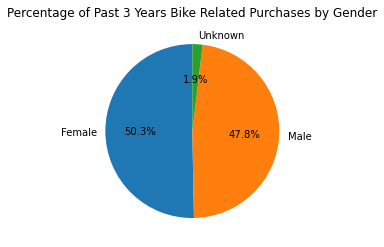

In [46]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate percentage of past 3 years bike related purchases by gender
purchase_count = customerdemographic_sheet.groupby("gender")["past_3_years_bike_related_purchases"].sum()
total_purchases = purchase_count.sum()
purchase_pct = purchase_count / total_purchases * 100

# Create pie chart
plt.pie(purchase_pct, labels=purchase_pct.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of Past 3 Years Bike Related Purchases by Gender")
plt.show()


In [47]:
import pandas as pd
from bokeh.io import show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure

# Create a pivot table with counts of each gender and wealth segment combination
pivot_table = customerdemographic_sheet.pivot_table(index="wealth_segment", columns="gender", values="customer_id", aggfunc="count")

# Convert pivot table to a ColumnDataSource object
source = ColumnDataSource(pivot_table)

# Create a figure with stacked bars
p = figure(title="Distribution of Wealth Segments by Gender", x_range=pivot_table.index.tolist(), plot_width=600, plot_height=400)
p.vbar_stack(stackers=["Female", "Male"], x="wealth_segment", source=source, color=["#c9d9d3", "#718dbf"], legend_label=["Female", "Male"])

# Add labels and legends
p.xaxis.axis_label = "Wealth Segment"
p.yaxis.axis_label = "Count"
p.legend.location = "top_right"
p.legend.title = "Gender"

# Show plot
show(p)


In [48]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.palettes import Spectral4


# Group data by job industry category and wealth segment
grouped_data = customerdemographic_sheet.groupby(["job_industry_category", "wealth_segment"]).size().reset_index(name="count")

# Pivot data to create stacked bar chart
pivot_data = grouped_data.pivot(index="job_industry_category", columns="wealth_segment", values="count")
pivot_data["total"] = pivot_data.sum(axis=1)
pivot_data = pivot_data.apply(lambda x: x/x["total"] * 100, axis=1)

# Create stacked bar chart
stacked_bar = figure(title="Distribution of Wealth Segments by Job Industry Category", x_range=pivot_data.index.tolist(), y_range=(0, 100), plot_height=400, plot_width=800, toolbar_location=None, tools="")
stacked_bar.vbar_stack(stackers=["High Net Worth", "Mass Customer", "Affluent", "Total"], x="index", width=0.9, color=Spectral4, source=pivot_data.reset_index(), legend_label=["High Net Worth", "Mass Customer", "Affluent", "Total"])

# Add axis labels and legend
stacked_bar.xaxis.axis_label = "Job Industry Category"
stacked_bar.yaxis.axis_label = "Percentage"
stacked_bar.legend.location = "top_left"
stacked_bar.legend.orientation = "horizontal"

# Show plot
show(stacked_bar)


##  CustomerAddress

In [49]:
customeraddress_sheet = pd.read_excel(r'C:/Users/aboub/OneDrive - um5.ac.ma/Desktop/MY RESEARCHS/KPMG stage data anlytics/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name ='CustomerAddress')

In [50]:
customeraddress_sheet

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [51]:
customeraddress_sheet.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [52]:
customeraddress_sheet.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [53]:
customeraddress_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [54]:
customeraddress_sheet.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [55]:
customeraddress_sheet['state'] = customeraddress_sheet['state'].replace('New South Wales', 'NSW')

In [56]:
customeraddress_sheet['state']

0       NSW
1       NSW
2       QLD
3       NSW
4       VIC
       ... 
3994    VIC
3995    QLD
3996    NSW
3997    QLD
3998    NSW
Name: state, Length: 3999, dtype: object

In [57]:
# Create bar chart
bar = figure(title="Property Valuation Distribution", x_axis_label="Property Valuation", y_axis_label="Count")
bar.vbar(x=customeraddress_sheet["property_valuation"].unique(), top=customeraddress_sheet["property_valuation"].value_counts().sort_index().values, width=0.5)

# Show plot
show(bar)

In [58]:
# save cleaned data to a some Excel file
customeraddress_sheet.to_excel('C:/Users/aboub/OneDrive - um5.ac.ma/Desktop/MY RESEARCHS/KPMG stage data anlytics/CustomerAddress.xlsx',sheet_name="CustomerAddress", index=False)

In [59]:
customerdemographic_sheet

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6.0
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,No,5.0
2,3410,Merrili,Brittin,Female,93,1940-09-22,Not Available,Property,Mass Customer,N,No,16.0
3,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0
4,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3779,Ulick,Daspar,Unknown,68,2018-01-01,Not Available,IT,Affluent Customer,N,No,0.0
3996,3883,Nissa,Conrad,Unknown,35,2018-01-01,Legal Assistant,IT,Mass Customer,N,No,0.0
3997,3931,Kylie,Epine,Unknown,19,2018-01-01,Not Available,IT,High Net Worth,N,Yes,0.0
3998,3935,Teodor,Alfonsini,Unknown,72,2018-01-01,Not Available,IT,High Net Worth,N,Yes,0.0


## Merge the three files on customer_id

In [60]:

# Merge the three files on customer_id
merged_data = pd.merge(transactions_sheet, customeraddress_sheet, on="customer_id")
merged_data = pd.merge(merged_data, customerdemographic_sheet, on="customer_id")


In [61]:
merged_data

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,19854,68,130,2017-02-02,1.0,Approved,OHM Cycles,Standard,medium,medium,...,Delete,Male,32,1997-07-18,Chemical Engineer,Manufacturing,Mass Customer,N,No,1.0
19964,17966,17,2789,2017-12-06,0.0,Approved,Solex,Standard,high,medium,...,Bucksey,Female,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0
19965,18462,80,2789,2017-06-20,0.0,Approved,OHM Cycles,Touring,low,medium,...,Bucksey,Female,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0
19966,17981,69,3446,2017-12-26,1.0,Approved,Giant Bicycles,Road,medium,medium,...,Tidy,Male,8,1967-01-30,Structural Engineer,Manufacturing,Mass Customer,N,No,14.0


In [62]:
merged_data.isna().sum()

transaction_id                           0
product_id                               0
customer_id                              0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_line                             0
product_class                            0
product_size                             0
list_price                               0
standard_cost                            0
product_first_sold_date                  0
Months                                   0
profit                                   0
product_size_num                       195
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
first_name                               0
last_name                                0
gender     

In [63]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  int64         
 1   product_id                           19968 non-null  int64         
 2   customer_id                          19968 non-null  int64         
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19968 non-null  float64       
 5   order_status                         19968 non-null  object        
 6   brand                                19968 non-null  object        
 7   product_line                         19968 non-null  object        
 8   product_class                        19968 non-null  object        
 9   product_size                         19968 non-null  object        
 10  list_price

In [64]:
merged_data['product_size_num'].value_counts()

2.0    12969
3.0     3970
1.0     2834
Name: product_size_num, dtype: int64

In [65]:
merged_data['product_size_num'].fillna(merged_data['product_size_num'].mean(), inplace = True)

In [66]:
merged_data['product_size_num']

0        2.0
1        2.0
2        2.0
3        3.0
4        2.0
        ... 
19963    2.0
19964    2.0
19965    2.0
19966    2.0
19967    2.0
Name: product_size_num, Length: 19968, dtype: float64

In [67]:
merged_data.isna().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
Months                                 0
profit                                 0
product_size_num                       0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bik

In [68]:
merged_data.dtypes

transaction_id                                  int64
product_id                                      int64
customer_id                                     int64
transaction_date                       datetime64[ns]
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                       float64
Months                                         object
profit                                        float64
product_size_num                              float64
address                                        object
postcode                                        int64
state                       

This code generates a scatterplot matrix for a subset of columns ('list_price', 'standard_cost', 'profit', 'property_valuation') in a Pandas DataFrame called 'merged_data'. The scatterplot matrix is a way to visualize the pairwise relationships between the selected columns, with each variable plotted against every other variable.

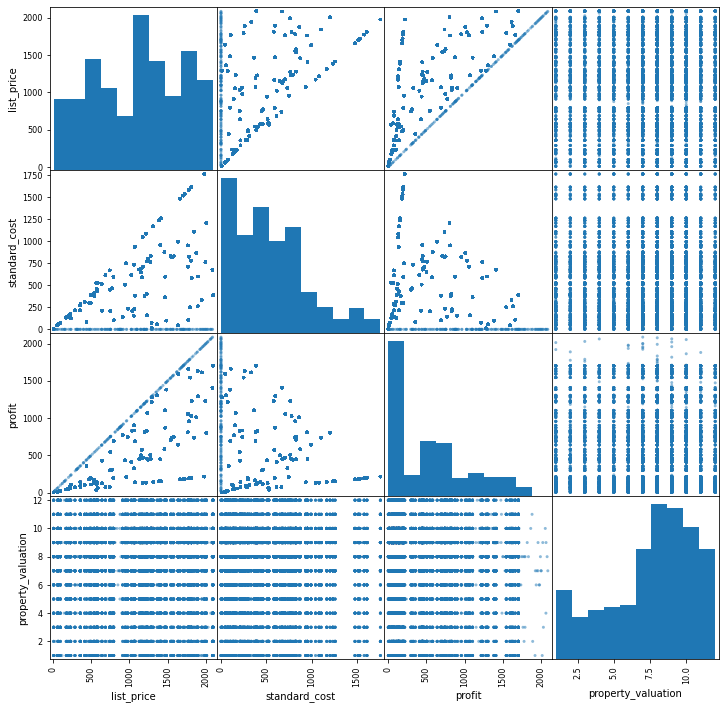

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Select columns for scatterplot matrix
cols = ['list_price', 'standard_cost', 'profit', 'property_valuation']

# Create scatterplot matrix
scatter_matrix(merged_data[cols], figsize=(12,12), diagonal='hist')

# Show plot
plt.show()

In [70]:
merged_data['state'].value_counts()

NSW         10685
VIC          4541
QLD          4262
Victoria      480
Name: state, dtype: int64

## Conclusion

In summary, we have performed several data cleaning and transformation steps on the provided dataset. We have addressed missing values by removing records with missing data or imputing values based on the distribution of the training dataset. We have also dealt with inconsistent values for the same attribute by replacing extended values into abbreviations and enforcing a drop-down list for user input. Moreover, we have addressed inconsistent data types for the same attribute by converting string values into numeric values or removing non-numeric characters. Finally, we have visualized the dataset using scatterplot matrix to identify any correlation or patterns among the selected columns. These steps have prepared the dataset for further analysis and modeling to gain insights and make predictions.


In [71]:
merged_data['state']= merged_data['state'].replace('Victoria',"VIC")

# Part 2

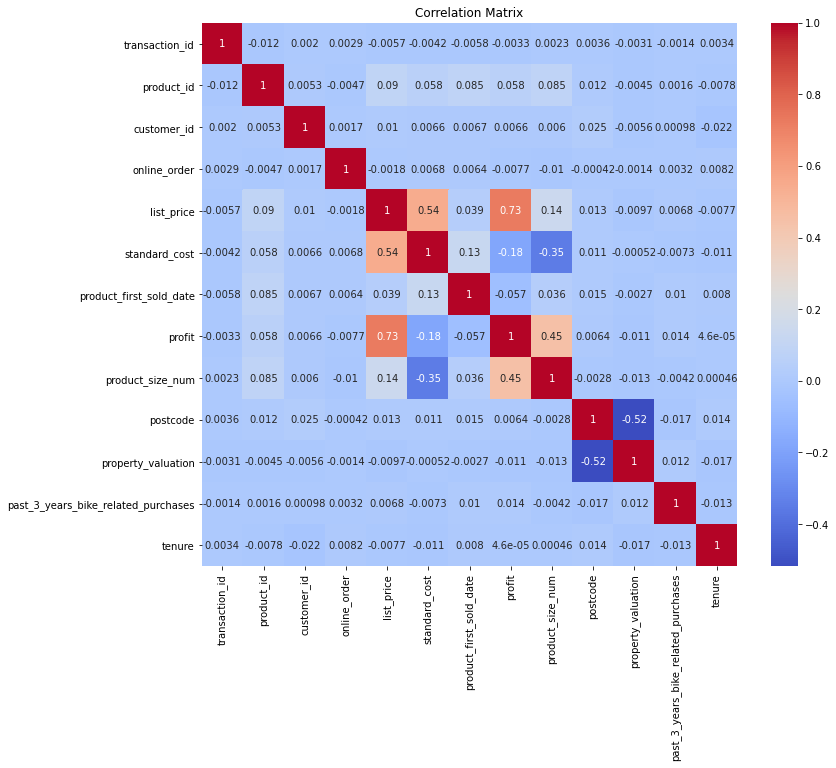

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix
corr_matrix = merged_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [73]:
# Convert transaction_date column to datetime
merged_data['transaction_date'] = pd.to_datetime(merged_data['transaction_date'])

# Calculate the number of months since the first transaction
merged_data['Months'] = (merged_data['transaction_date'] - merged_data['transaction_date'].min()) / np.timedelta64(1, 'M')

# Convert Months column to integer
merged_data['Months'] = merged_data['Months'].astype(int)


In [74]:
# Import necessary libraries
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6

# Calculate the counts of old and new customers
old_customers = merged_data[merged_data['Months'] >= 12]['customer_id'].nunique()
new_customers = merged_data[merged_data['Months'] < 12]['customer_id'].nunique()

# Create a ColumnDataSource object
source = ColumnDataSource(data=dict(x=['Old Customers', 'New Customers'],
                                    counts=[old_customers, new_customers],
                                    color=Spectral6))

# Create the figure and plot the bar chart
p = figure(x_range=['Old Customers', 'New Customers'], plot_height=400, title='Distribution of Old and New Customers')
p.vbar(x='x', top='counts', width=0.5, color='color', legend_field='x', source=source)

# Set axis labels and legend
p.xaxis.axis_label = 'Customer Type'
p.yaxis.axis_label = 'Number of Customers'
p.legend.title = 'Customer Type'

# Show the plot
show(p)


In [75]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource

# Determine the first transaction date for each customer
first_transaction_by_customer = merged_data.groupby('customer_id')['transaction_date'].min()

# Merge the first transaction date with the merged_df
merged_df_with_first_transaction = merged_data.merge(first_transaction_by_customer, on='customer_id', suffixes=('', '_first'))

# Add a column indicating if the customer is new or old
merged_df_with_first_transaction['customer_type'] = 'new'
merged_df_with_first_transaction.loc[merged_df_with_first_transaction['transaction_date'] > merged_df_with_first_transaction['transaction_date_first'], 'customer_type'] = 'old'

# Group customers by month and count the number of new and old customers in each month
customer_count_by_month = merged_df_with_first_transaction.groupby([pd.Grouper(key='transaction_date', freq='M'), 'customer_type'])['customer_id'].nunique().reset_index()

# Pivot the data to get new and old customer counts in separate columns
customer_count_by_month_pivot = customer_count_by_month.pivot(index='transaction_date', columns='customer_type', values='customer_id').reset_index()

# Create a ColumnDataSource object
source = ColumnDataSource(customer_count_by_month_pivot)

# Create a figure object
p = figure(x_axis_type='datetime', plot_width=800, plot_height=400, title='Number of Customers by Month')

# Add a stacked bar chart
p.vbar_stack(stackers=['new', 'old'], x='transaction_date', color=['green', 'blue'], source=source, legend_label=['New Customers', 'Old Customers'])

# Set the x-axis label
p.xaxis.axis_label = 'Month'

# Set the y-axis label
p.yaxis.axis_label = 'Number of Customers'

# Show the legend
p.legend.location = 'top_left'

# Show the plot
show(p)


In [76]:
from bokeh.io import show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category20_16
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

# Create a data source
source = ColumnDataSource(data=dict(x=[str(brand) for brand in merged_data['brand'].unique()], y=merged_data['brand'].value_counts().values.tolist()))

# Define a color palette to use for the charts
colors = Category20_16

# Create the figure
p = figure(x_range=source.data['x'], plot_height=350, title="Top Bike Brands Sold to Customers", toolbar_location=None, tools="")

# Create the bar chart
p.vbar(x='x', top='y', width=0.9, source=source, 
       line_color='white', fill_color=factor_cmap('x', palette=colors, factors=source.data['x']))

# Rotate the x-axis labels for readability
p.xaxis.major_label_orientation = 1.2

show(p)


In [77]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource


from bokeh.transform import cumsum
from bokeh.palettes import Spectral6

# Calculate the age of each customer
merged_data['DOB'] = pd.to_datetime(merged_data['DOB'])
today = pd.to_datetime('today')
merged_data['age'] = today.year - merged_data['DOB'].dt.year

# Create a new column for new customers
merged_data['new_customer'] = (merged_data['Months'] < 12)

# Filter the data to only include new customers
new_customers = merged_data[merged_data['new_customer']]

# Create a histogram of age distribution for new customers
hist, edges = np.histogram(new_customers['age'], bins=10)

# Create a ColumnDataSource object for the histogram
hist_source = ColumnDataSource(data=dict(age_left=edges[:-1], age_right=edges[1:], counts=hist))

# Create a vertical bar chart
p1 = figure(plot_height=400, plot_width=600, title='Age Distribution of New Customers')
p1.vbar(x='age_left', top='counts', bottom=0, width=1, source=hist_source)

# show 
show(p1)

In [78]:
merged_data['age'] 

0        68
1        68
2        68
3        44
4        44
         ..
19963    26
19964    31
19965    31
19966    56
19967    56
Name: age, Length: 19968, dtype: int64

In [79]:
merged_data

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,new_customer
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68,True
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68,True
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68,True
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,44,True
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,44,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,19854,68,130,2017-02-02,1.0,Approved,OHM Cycles,Standard,medium,medium,...,32,1997-07-18,Chemical Engineer,Manufacturing,Mass Customer,N,No,1.0,26,True
19964,17966,17,2789,2017-12-06,0.0,Approved,Solex,Standard,high,medium,...,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0,31,True
19965,18462,80,2789,2017-06-20,0.0,Approved,OHM Cycles,Touring,low,medium,...,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0,31,True
19966,17981,69,3446,2017-12-26,1.0,Approved,Giant Bicycles,Road,medium,medium,...,8,1967-01-30,Structural Engineer,Manufacturing,Mass Customer,N,No,14.0,56,True


In [80]:
merged_data.to_csv('C:/Users/aboub/OneDrive - um5.ac.ma/Desktop/MY RESEARCHS/KPMG stage data anlytics/data.csv', index=False)

In [81]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6

# Calculate the age of each customer
merged_data['DOB'] = pd.to_datetime(merged_data['DOB'])
today = pd.to_datetime('today')
merged_data['age'] = today.year - merged_data['DOB'].dt.year

# Create a new column for new customers
merged_data['new_customer'] = (merged_data['Months'] < 12)

# Filter the data to only include new customers
new_customers = merged_data[merged_data['new_customer']]

# Create a data source for the pie chart
gender_counts = new_customers['gender'].value_counts()
gender_percents = [count/len(new_customers)*100 for count in gender_counts]
pie_source = ColumnDataSource(data=dict(gender=gender_counts.index.tolist(), percent=gender_percents, color=Spectral6[:len(gender_counts)]))

# Create the figure
p = figure(plot_height=400, plot_width=600, title='Gender Distribution of New Customers', toolbar_location=None,
           tools="hover", tooltips="@gender: @percent{0.2f}%")

# Add the pie glyph
p.wedge(x=0, y=1, radius=0.4, start_angle=0, end_angle='percent', line_color="white", fill_color='color', legend_field='gender', source=pie_source)

# Set the legend position
p.legend.label_text_font_size = '8pt'
p.legend.location = "top_left"

# Show the plot
show(p)


In [82]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.layouts import column

# Calculate the age of each customer
merged_data['DOB'] = pd.to_datetime(merged_data['DOB'])
today = pd.to_datetime('today')
merged_data['age'] = today.year - merged_data['DOB'].dt.year

# Filter the data to only include new customers
new_customers = merged_data[merged_data['Months'] < 12]

# Create a histogram of the age distribution
hist, edges = np.histogram(new_customers['age'], bins=10)
p3 = figure(title='Age Distribution of New Customers', x_axis_label='Age', y_axis_label='Count')
p3.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color='#b3de69')

# Show the plot
show(column(p3))


In [83]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show
from bokeh.layouts import column
from bokeh.models import HoverTool, ColumnDataSource

# Calculate the age of each customer
merged_data['DOB'] = pd.to_datetime(merged_data['DOB'])
today = pd.to_datetime('today')
merged_data['age'] = today.year - merged_data['DOB'].dt.year

# Filter the data to only include new customers
new_customers = merged_data[merged_data['Months'] < 12]

# Create a histogram of the age distribution by gender
hist, edges = np.histogram(new_customers[new_customers['gender'] == 'Female']['age'], bins=10, range=[0, 100], density=True)
hist2, edges2 = np.histogram(new_customers[new_customers['gender'] == 'Male']['age'], bins=10, range=[0, 100], density=True)
hist3, edges3 = np.histogram(new_customers[new_customers['gender'] == 'Unknown']['age'], bins=10, range=[0, 100], density=True)

# Create a data source for the histogram
source = ColumnDataSource(data=dict(
    age_left=edges[:-1], age_right=edges[1:],
    female_counts=hist, male_counts=hist2, unknown_counts=hist3
))

# Create the figure
p = figure(title='Age Distribution of New Customers by Gender', x_axis_label='Age', y_axis_label='Density')

# Add the histogram bars for females
p.quad(
    top='female_counts', bottom=0, left='age_left', right='age_right',
    fill_color='#b3de69', line_color='white', legend_label='Female', source=source
)

# Add the histogram bars for males
p.quad(
    top='male_counts', bottom=0, left='age_left', right='age_right',
    fill_color='#33a02c', line_color='white', legend_label='Male', source=source
)

# Add the histogram bars for unknown gender
p.quad(
    top='unknown_counts', bottom=0, left='age_left', right='age_right',
    fill_color='#a6cee3', line_color='white', legend_label='Unknown', source=source
)

# Add a hover tool to show the percentage of each age group for each gender
hover = HoverTool(
    tooltips=[
        ('Age', '@age_left to @age_right'),
        ('Female', '@female_counts{0.2f}%'),
        ('Male', '@male_counts{0.2f}%'),
        ('Unknown', '@unknown_counts{0.2f}%')
    ],
    mode='vline'
)
p.add_tools(hover)

# Set the legend position
p.legend.location = "top_right"

# Show the plot
show(column(p))


In [84]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import NumeralTickFormatter

# Group the data by month and calculate the total sales for each month
monthly_sales = merged_data.groupby(pd.Grouper(key='transaction_date', freq='M'))['profit'].sum().reset_index()

# Create the figure
p = figure(title='Monthly Sales', x_axis_label='Month', y_axis_label='Total Sales')

# Add the line chart
p.line(x=monthly_sales['transaction_date'], y=monthly_sales['profit'], line_width=2)

# Add a number formatter to the y-axis to format the sales values as currency
p.yaxis[0].formatter = NumeralTickFormatter(format='$0,0')

# Show the plot
show(p)


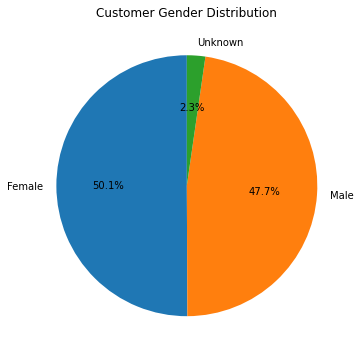

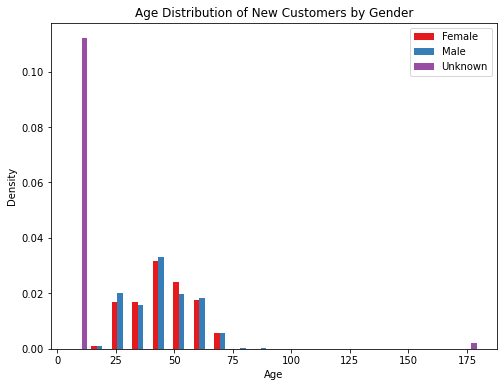

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Count the number of customers by gender
gender_counts = merged_data['gender'].value_counts()

# Calculate the percentage of customers by gender
gender_percentages = gender_counts / gender_counts.sum() * 100

# Plot the gender distribution
plt.figure(figsize=(6,6))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Gender Distribution')
plt.show()

# Calculate the age of each customer
merged_data['DOB'] = pd.to_datetime(merged_data['DOB'])
today = pd.to_datetime('today')
merged_data['age'] = today.year - merged_data['DOB'].dt.year

# Plot the age distribution by gender
female_age = merged_data[merged_data['gender'] == 'Female']['age']
male_age = merged_data[merged_data['gender'] == 'Male']['age']
unknown_age = merged_data[merged_data['gender'] == 'Unknown']['age']

plt.figure(figsize=(8,6))
plt.hist([female_age, male_age, unknown_age], bins=20, density=True, color=['#e41a1c','#377eb8','#984ea3'], label=['Female', 'Male', 'Unknown'])
plt.title('Age Distribution of New Customers by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


In [86]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap

# Create a ColumnDataSource from the merged_data DataFrame
source = ColumnDataSource(data={
    'gender': merged_data['gender'],
    'age': merged_data['age']
})

# Define the factors and colors for the bar chart
factors = ['Female', 'Male', 'Unknown']
colors = factor_cmap('gender', palette=Spectral6, factors=factors)

# Create the bar chart
p = figure(x_range=factors, plot_height=350, title='Age Distribution by Gender')
p.vbar(x='gender', top='age', source=source, width=0.5, color=colors)

# Set the axis labels and tick labels
p.xaxis.axis_label = 'Gender'
p.yaxis.axis_label = 'Age'
p.xaxis.major_label_orientation = 1.2

# Output the visualization to an HTML file and show it
output_file('age_distribution.html')
show(p)


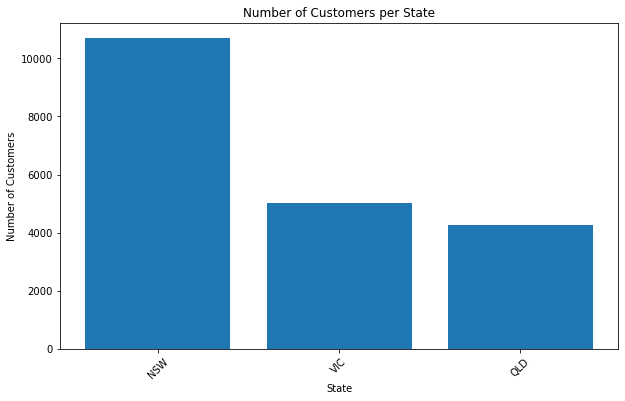

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the customers by state and count the number of customers in each state
state_counts = merged_data.groupby('state').size().reset_index(name='count')
state_counts = state_counts.sort_values(by='count', ascending=False)

# Create a bar chart of the number of customers per state
plt.figure(figsize=(10,6))
plt.bar(state_counts['state'], state_counts['count'], color='#1f77b4')
plt.title('Number of Customers per State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


In [88]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim

# Group the customers by state and count the number of customers in each state
state_counts = merged_data.groupby('state').size().reset_index(name='count')

# Get the latitude and longitude of each state
geolocator = Nominatim(user_agent='myapp')
state_counts['location'] = state_counts['state'].apply(geolocator.geocode)

# Create a map centered on the United States
us_center = [37.0902, -95.7129]
us_zoom = 4
us_map = folium.Map(location=us_center, zoom_start=us_zoom)

# Add markers to the map for each state with the number of customers as the marker label
for i, row in state_counts.iterrows():
    state = row['state']
    count = row['count']
    location = row['location']
    if location is not None:
        lat = location.latitude
        lon = location.longitude
        # Create a marker for the state with the number of customers as the label
        marker = folium.Marker(location=[lat, lon], popup=state + ': ' + str(count))
        marker.add_to(us_map)

# Display the map
us_map


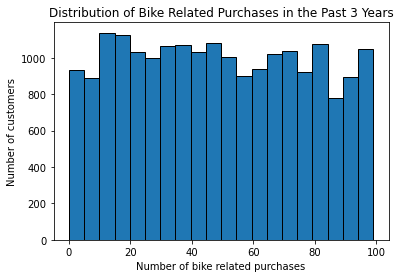

In [89]:
import matplotlib.pyplot as plt

# Create a histogram of past_3_years_bike_related_purchases
plt.hist(merged_data['past_3_years_bike_related_purchases'], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Number of bike related purchases')
plt.ylabel('Number of customers')
plt.title('Distribution of Bike Related Purchases in the Past 3 Years')

# Show the plot
plt.show()


In [91]:
merged_data.dtypes

transaction_id                                  int64
product_id                                      int64
customer_id                                     int64
transaction_date                       datetime64[ns]
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                       float64
Months                                          int32
profit                                        float64
product_size_num                              float64
address                                        object
postcode                                        int64
state                       

In [92]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6
import pandas as pd


# Group the data by job industry category and calculate the mean of past_3_years_bike_related_purchases for each category
grouped_data = merged_data.groupby('job_industry_category')['past_3_years_bike_related_purchases'].mean().reset_index(name='mean_bike_purchases')

# Create a bar chart with job industry category on the x-axis and mean past_3_years_bike_related_purchases on the y-axis
source = ColumnDataSource(grouped_data)
p = figure(x_range=grouped_data['job_industry_category'], plot_height=350, title="Mean Bike Purchases by Job Industry Category")
p.vbar(x='job_industry_category', top='mean_bike_purchases', width=0.9, source=source, line_color='white', fill_color=factor_cmap('job_industry_category', palette=Spectral6, factors=grouped_data['job_industry_category']))

# Customize the plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1.2

# Show the plot
show(p)


C:\ProgramData\Anaconda3\lib\site-packages\bokeh\models\mappers.py:150: UserWarning: Palette length does not match number of factors. 6         Not Available
7              Property
8                Retail
9    Telecommunications
Name: job_industry_category, dtype: object will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [93]:
merged_data['DOB'].value_counts()

2018-01-01    446
1978-01-30     48
1962-12-17     33
1968-07-28     30
1999-07-28     27
             ... 
1974-10-23      1
2000-08-26      1
1977-08-28      1
1995-11-12      1
1971-04-13      1
Name: DOB, Length: 3048, dtype: int64

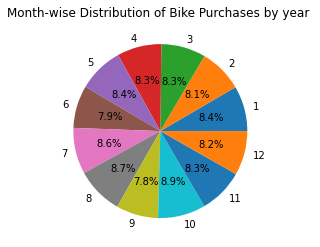

In [94]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'transaction_date' column to a pandas datetime object
merged_data['transaction_date'] = pd.to_datetime(merged_data['transaction_date'])

# Filter the data to only include purchases from the last 3 years
start_date = merged_data['transaction_date'].max() - pd.DateOffset(years=3)
filtered_data = merged_data[merged_data['transaction_date'] >= start_date]

# Extract the month from the 'transaction_date' column and group the data by month
filtered_data['month'] = filtered_data['transaction_date'].dt.month
grouped_data = filtered_data.groupby('month').size()

# Create a pie chart
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%')
plt.title('Month-wise Distribution of Bike Purchases by year ')

# Show the chart
plt.show()


In [95]:
import pandas as pd
from bokeh.plotting import figure, show

# Convert the 'transaction_date' column to a pandas datetime object
merged_data['transaction_date'] = pd.to_datetime(merged_data['transaction_date'])

# Filter the data to only include purchases from the last 3 years
start_date = merged_data['transaction_date'].max() - pd.DateOffset(years=3)
filtered_data = merged_data[merged_data['transaction_date'] >= start_date]

# Extract the month from the 'transaction_date' column and group the data by month
filtered_data['month'] = filtered_data['transaction_date'].dt.month
grouped_data = filtered_data.groupby('month').size().reset_index(name='counts')

# Create a bar chart
p = figure(x_range=(1, 12), plot_height=250, title='Month-wise Distribution of Bike Purchases')
p.vbar(x=grouped_data['month'], top=grouped_data['counts'], width=0.9)

# Customize the chart
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.axis_label = 'Month'
p.yaxis.axis_label = 'Number of Purchases'

# Show the chart
show(p)


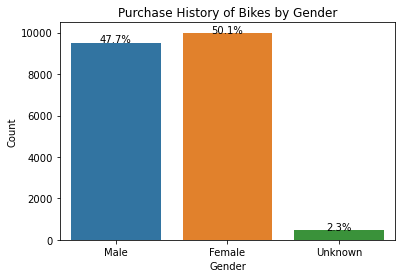

In [96]:
import seaborn as sns

# Filter the data to only include purchases from the last 3 years
start_date = merged_data['transaction_date'].max() - pd.DateOffset(years=3)
filtered_data = merged_data[merged_data['transaction_date'] >= start_date]

# Create a count plot
ax = sns.countplot(x='gender', data=filtered_data)

# Set the plot title and axes labels
plt.title('Purchase History of Bikes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add percentage values to each bar
total = len(filtered_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+2, f'{height/total:.1%}', ha="center")

# Show the plot
plt.show()


In [97]:
purchase_count_by_gender = merged_data.groupby('gender').size()


In [98]:
purchase_count_by_gender

gender
Female     9997
Male       9516
Unknown     455
dtype: int64

In [99]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.palettes import Spectral4
from bokeh.transform import factor_cmap
import pandas as pd


# Aggregate the data by job industry category
grouped_data = merged_data.groupby("job_industry_category").size().reset_index(name="count")

# Sort the job industry categories by count in descending order
sorted_data = grouped_data.sort_values(by="count", ascending=False)
job_industry_categories = sorted_data["job_industry_category"].tolist()

# Create a Bokeh figure
p = figure(x_range=FactorRange(factors=job_industry_categories), 
           plot_height=400, plot_width=600, 
           title="Job Industry Categories")

# Add vertical bars to the plot
p.vbar(x="job_industry_category", top="count", source=ColumnDataSource(sorted_data),
       width=0.9, line_color="white", fill_color=factor_cmap('job_industry_category', palette=Spectral4, factors=job_industry_categories))

# Customize the plot axes
p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Job Industry Category"
p.xaxis.major_label_orientation = 1.2
p.yaxis.axis_label = "Count"

# Show the plot
show(p)


C:\ProgramData\Anaconda3\lib\site-packages\bokeh\models\mappers.py:150: UserWarning: Palette length does not match number of factors. ['Retail', 'Property', 'IT', 'Entertainment', 'Argiculture', 'Telecommunications'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [100]:
merged_data['wealth_segment'].value_counts()

Mass Customer        10029
High Net Worth        5081
Affluent Customer     4858
Name: wealth_segment, dtype: int64

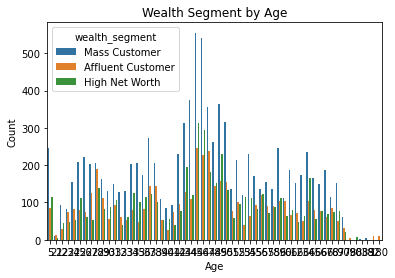

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data to exclude null age values
filtered_data = merged_data.dropna(subset=['age'])

# Create a count plot of wealth segment by age
sns.countplot(x='age', hue='wealth_segment', data=filtered_data)

# Set the plot title and axes labels
plt.title('Wealth Segment by Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()


In [102]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.palettes import Spectral4
from bokeh.transform import factor_cmap
import pandas as pd

# Define the data
wealth_segment_data = {
    "wealth_segment": ["Mass Customer", "High Net Worth", "Affluent Customer"],
    "count": [10029, 5081, 4858]
}

# Create a Bokeh figure
p = figure(x_range=FactorRange(factors=list(wealth_segment_data["wealth_segment"])), 
           plot_height=400, plot_width=600, 
           title="Wealth Segment Customers")

# Add vertical bars to the plot
p.vbar(x="wealth_segment", top="count", source=ColumnDataSource(wealth_segment_data),
       width=0.9, line_color="white", fill_color=factor_cmap('wealth_segment', palette=Spectral4, factors=list(wealth_segment_data["wealth_segment"])))

# Customize the plot axes
p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Wealth Segment"
p.xaxis.major_label_orientation = 1.2
p.yaxis.axis_label = "Number of Customers"

# Show the plot
show(p)


In [103]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral3
import pandas as pd

# Group the data by age and wealth segment and count the number of customers
grouped_data = merged_data.groupby(['age', 'wealth_segment'])['customer_id'].count().reset_index()

# Pivot the data to create a new DataFrame with age as index, wealth segment types as columns, and counts as values
pivot_data = grouped_data.pivot(index='age', columns='wealth_segment', values='customer_id').fillna(0)

# Create a Bokeh ColumnDataSource
source = ColumnDataSource(pivot_data)

# Create a Bokeh figure
p = figure(plot_height=400, plot_width=600, title="Wealth Segment by Age",
           x_axis_label="Age", y_axis_label="Count", toolbar_location="above")

# Add stacked bars to the plot
p.vbar_stack(stackers=["Mass Customer", "Affluent Customer", "High Net Worth"], 
             x='age', source=source,
             width=0.9, line_color="white", 
             fill_color=Spectral3,
             legend_label=["Mass Customer", "Affluent Customer", "High Net Worth"], 
             muted_alpha=0.2)

# Customize the plot axes
p.y_range.start = 0
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"

# Add a hover tool to display the wealth segment and count on hover
p.add_tools(HoverTool(tooltips=[("Age", "@age"), ("Mass Customer", "@{Mass Customer}"), 
                                ("Affluent Customer", "@{Affluent Customer}"), 
                                ("High Net Worth", "@{High Net Worth}")], 
                      mode="mouse"))

# Show the plot
show(p)


In [104]:
merged_data['owns_car'].value_counts()

Yes    10042
No      9926
Name: owns_car, dtype: int64

In [107]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral4
import pandas as pd

# Convert the owns_car column to a categorical data type
merged_data['owns_car'] = pd.Categorical(merged_data['owns_car'], categories=['Yes', 'No'], ordered=True)

# Group the data by wealth segment, owns_car category, and state, and count the number of customers
grouped_data = merged_data.groupby(['wealth_segment', 'owns_car', 'state']).size().reset_index(name='count')

# Create a Bokeh ColumnDataSource
source = ColumnDataSource(grouped_data)

# Define color map for each owns_car category
car_color_map = factor_cmap('owns_car', palette=Spectral4, factors=['Yes', 'No'])

# Create a Bokeh figure
p = figure(plot_height=400, plot_width=600, title="Wealth Segment vs Owns Car by State",
           x_axis_label="Wealth Segment", y_axis_label="Count", 
           x_range=grouped_data['wealth_segment'].unique())

# Add stacked vertical bars to the plot
p.vbar(x="wealth_segment", top="count", source=source, 
       width=0.35, line_color="white", 
       fill_color=car_color_map, 
       legend_field="owns_car")

# Customize the plot axes
p.y_range.start = 0
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"

# Add a hover tool to display the owns_car category and count on hover
p.add_tools(HoverTool(tooltips=[("Owns Car", "@owns_car"), ("Count", "@count")], 
                      mode="mouse"))

# Set the legend location and orientation
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

# Show the plot
show(p)


In [109]:
merged_data['state'].value_counts()

NSW    10685
VIC     5021
QLD     4262
Name: state, dtype: int64

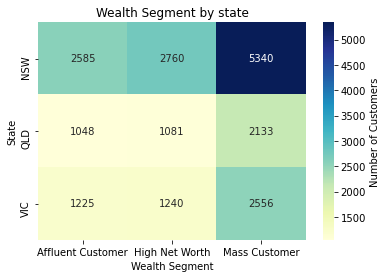

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by wealth segment and state, and count the number of customers
grouped_data = merged_data.groupby(['wealth_segment', 'state']).size().reset_index(name='count')

# Pivot the data to create a matrix for the heatmap
heatmap_data = grouped_data.pivot(index='state', columns='wealth_segment', values='count')

# Create a heatmap using Seaborn
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Customers'})

# Customize the plot axes
plt.title('Wealth Segment by state')
plt.xlabel('Wealth Segment')
plt.ylabel('State')

# Show the plot
plt.show()
